# Bank Marketing - Data Analysis and Machine Learning Project

### I. Import the libraries and the dataset, performing some initial checks of the data

In [1]:
# Import the necessary data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_marketing = pd.read_csv('data/bank-additional/bank-additional-full.csv', delimiter = ';')
bank_marketing.head(10)
# Can also import the dataset using an existing Python library associated with UCI Machine Learning Repository
# https://github.com/uci-ml-repo/ucimlrepo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Number of rows and columns
bank_marketing.shape

(41188, 21)

In [4]:
# Get an overview of numerical columns
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Check for data types
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Check for null values
bank_marketing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Check for unique values
bank_marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
# Check for duplicated rows
print(f'Number of duplicated rows in the dataset: {bank_marketing.duplicated().sum()}')
print(f'The index of duplicated rows: {bank_marketing.duplicated()[bank_marketing.duplicated() == True].index.tolist()}')
# bank_marketing.duplicated()[bank_marketing.duplicated() == True]: only extracts the duplicated rows (except for the first occurence)

Number of duplicated rows in the dataset: 12
The index of duplicated rows: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]


### II. Exploratory data analysis

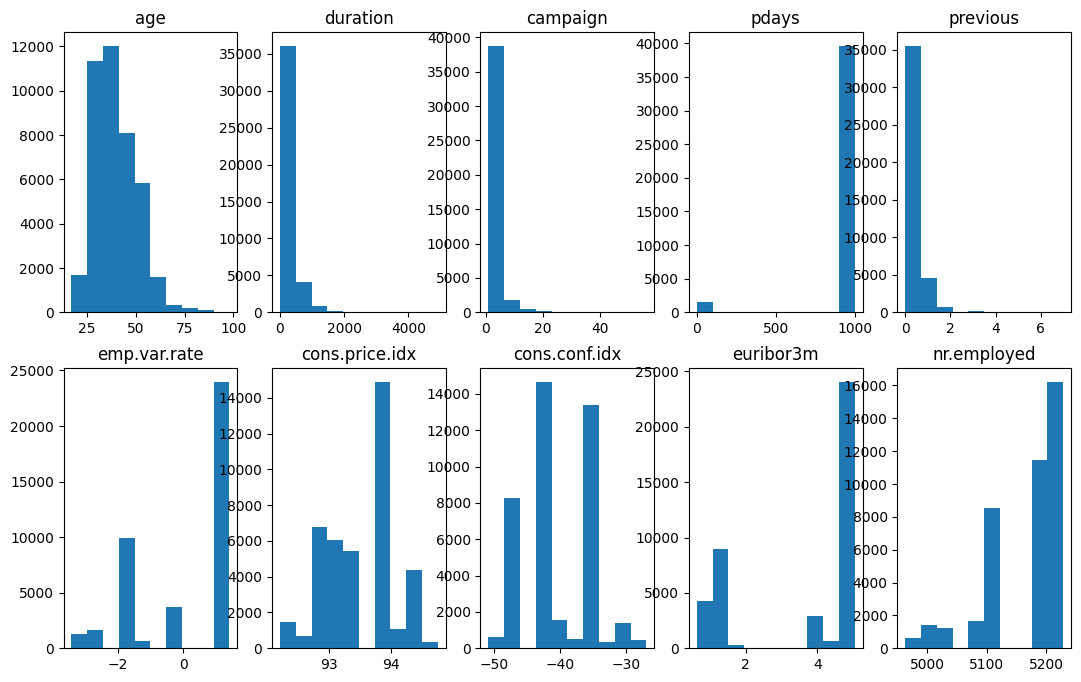

In [9]:
numerical_col_list = [bank_marketing.describe().columns.tolist()] # keep a list of numerical columns
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_col_list[0]:
    ax[counter // 5][counter % 5].hist(bank_marketing[var])
    ax[counter // 5][counter % 5].set_title(var)
    counter += 1

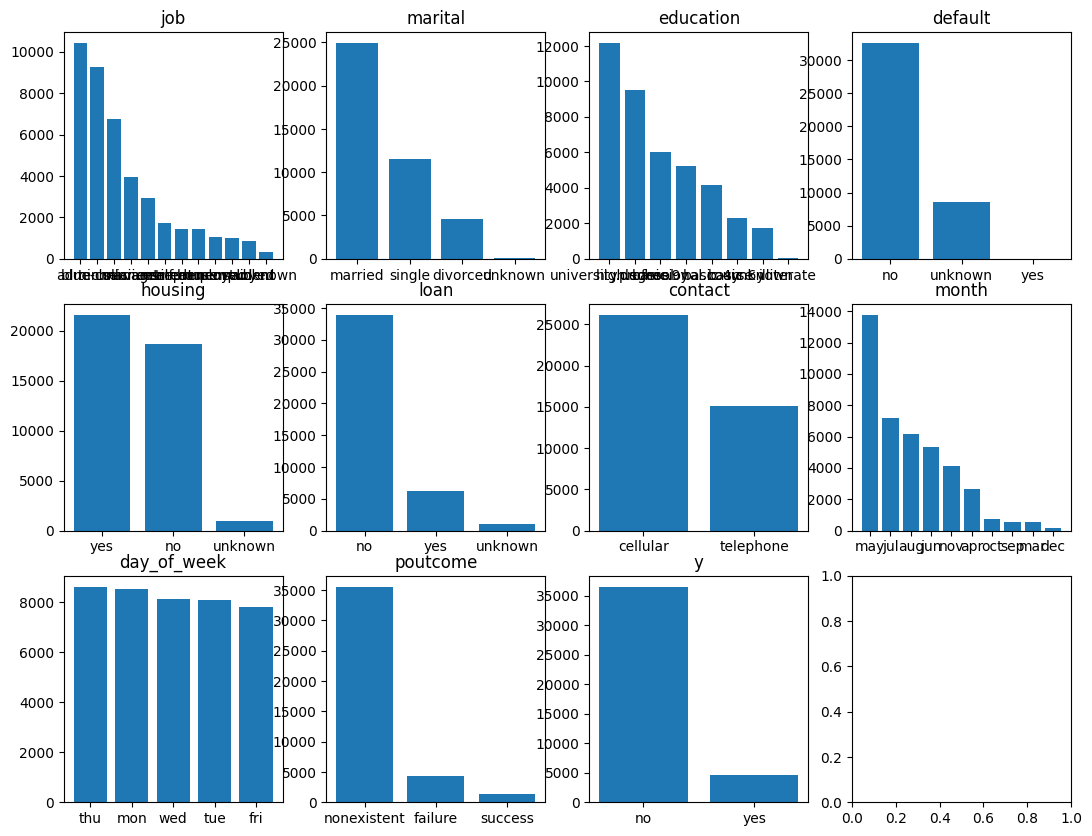

In [15]:
# Drop the numerical columns from the dataset to have a list of categorical columns
categorical_col_list = bank_marketing.drop(bank_marketing.describe().columns.tolist(), axis = 'columns').columns.tolist()
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10))

counter = 0
for var in categorical_col_list:
    ax_obj = ax[counter // 4][counter % 4]
    ax_obj.bar(bank_marketing[var].value_counts().index, bank_marketing[var].value_counts().values)
    ax_obj.set_title(var)
    counter += 1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'services'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

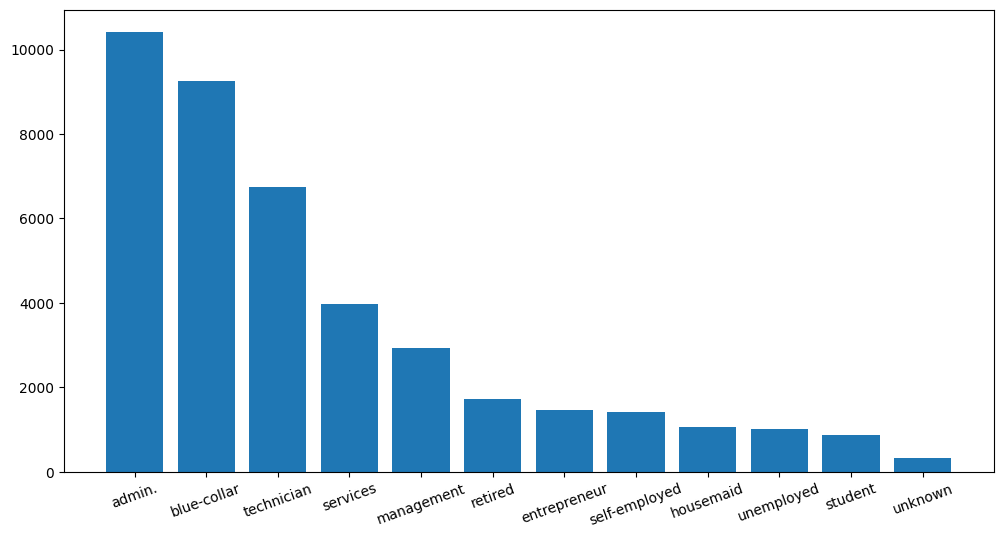

In [19]:
# Zoom in for bar plots with many categories
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['job'].value_counts().index, bank_marketing['job'].value_counts().values)
plt.xticks(rotation = 20)

<BarContainer object of 8 artists>

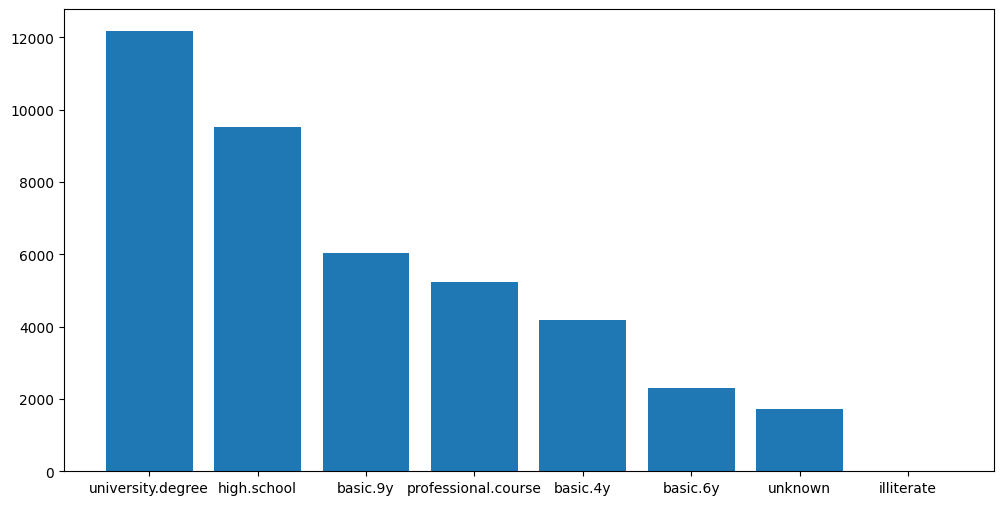

In [24]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['education'].value_counts().index, bank_marketing['education'].value_counts().values)

<BarContainer object of 10 artists>

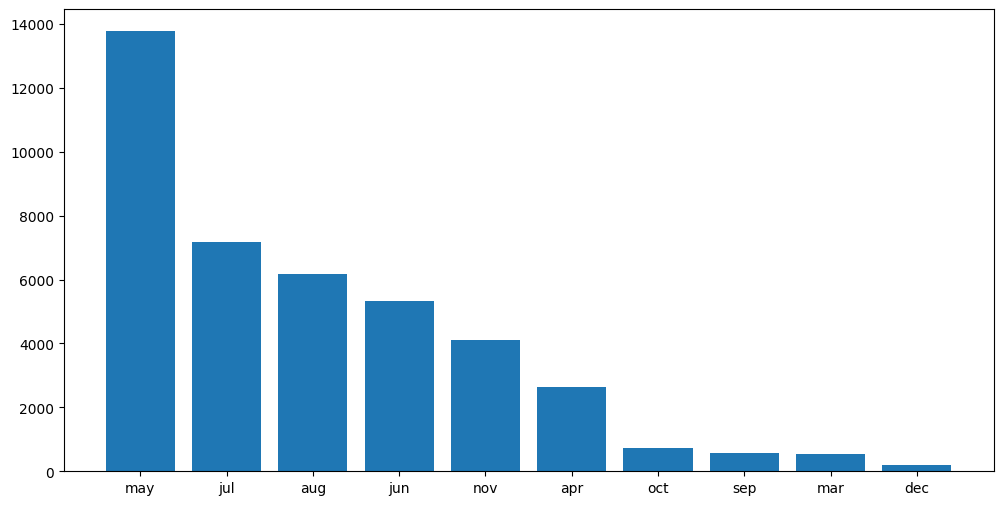

In [25]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['month'].value_counts().index, bank_marketing['month'].value_counts().values)